# corner detection

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
image=cv2.imread("./chessboard.png")
gray_scale=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [7]:
image=image.astype(np.float32)

# corner detction

In [32]:
corners=cv2.cornerHarris(gray_scale,2,3,0.04)

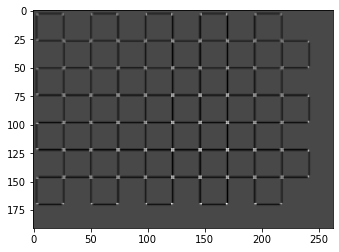

In [33]:
plt.imshow(corners,'gray')

In [34]:
# dilation but not important
dilate_image=cv2.dilate(corners,None)

In [35]:
image[dilate_image>0.01*dilate_image.max()]=[0,0,255]

In [37]:
# plt.imshow(image)

In [41]:
# dilate_image >0.01 *dilate_image.max()

# Corner with SubPixel Accuracy

In [61]:
filename = './chessboard2.jpeg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

In [50]:
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

In [57]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

In [59]:
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]


In [71]:
# plt.imshow(img)